# CSHS Inequality

This tutorial shows how to run CSHS version of Bell's inequality experiment in Braket on local simulator and a QPU.   

## References 

[1]  Bell, J. S. On the Einstein Podolsky Rosen Paradox. Physics Physique Fizika 1, no. 3 (November 1, 1964): 195–200. https://doi.org/10.1103/PhysicsPhysiqueFizika.1.195. 

[2] Greenberger, Daniel M., Michael A. Horne, Abner Shimony, and Anton Zeilinger (1990). Bell’s Theorem without Inequalities. American Journal of Physics 58, no. 12: 1131–43. https://doi.org/10.1119/1.16243. 

[3] John F. Clauser, Michael A. Horne, Abner Shimony, and Richard A. Holt. Proposed Experiment to Test Local Hidden-Variable Theories. Phys. Rev. Lett. 23, 880 – Published 13 October 1969; Erratum Phys. Rev. Lett. 24, 549 (1970) https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.23.880

[4] The Nobel Committee for Physics, Scientifc Background on the Nobel Prize in Physics 2022, https://www.nobelprize.org/uploads/2022/10/advanced-physicsprize2022.pdf

[5] John Preskill, Quantum Information and Computation, Chapter 4, Page 18, http://theory.caltech.edu/~preskill/ph229/notes/chap4_01.pdf

# Run on a local simulator

In [1]:
import numpy as np
from braket.devices import LocalSimulator
from braket.tracking import Tracker

from braket.experimental.algorithms.cshs_inequality import (
    get_cshs_results,
    submit_cshs_tasks
)

tracker = Tracker().start()  # to keep track of Braket costs

CSHS Inequality experiment consists of four circuits acting on two qubits each. The four circuits are grouped together in the `submit_cshs_tasks` function below. To run on a local noise-free simulator, we can call this function. This function takes take the theta angle values as parameters.

First we run on simulator to see the angles providing maximum violations.

In [2]:
local_simulator = LocalSimulator()
n = 100
tv = np.linspace(0,2*np.pi,n)
cshs_inequality_lhs_max=0
cshs_inequality_lhs_max_theta=0
CHSHValArr = []

for t in tv:
    #Set Verbose flag for the iteration around 15th % of the angle range
    # so that circuits and info for that iteration is printed
    verboseflag=False
    if (t==tv[15*int(n/100)]):
        print("t:",t)
        verboseflag=True
    local_tasks = submit_cshs_tasks(local_simulator,a=t,a_=t,b=0,b_=0,verbose=verboseflag)
    #To gather the results of CSHS's inequality test, 
    #we call the `get_cshs_results` of the tasks from above. 
    cshs_value,cshs_inequality_lhs,results, E_ab, E_ab_,E_a_b,E_a_b_ = \
    get_cshs_results(local_tasks,verbose=verboseflag)
    if cshs_inequality_lhs>cshs_inequality_lhs_max:
        cshs_inequality_lhs_max=abs(cshs_inequality_lhs)
        cshs_inequality_lhs_max_theta=t
    CHSHValArr.append(cshs_value)
    
print("\nFor all the iterations:\n Max cshs_inequality:",cshs_inequality_lhs_max,
      "Corresponding theta:",cshs_inequality_lhs_max_theta)

t: 0.9519977738150889
a: 0.9519977738150889
a_: 0.9519977738150889
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(0.95)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(0.95)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(0.95)-H-
        |            
q1 : ---X------------

T  : |0|1|   2    |3|
circ_a_b_
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(0.95)-H-
        |            
q1 : ---X-H----------

T  : |0|1|   2    |3|
cshs_value: 2.77
E(a,b) = 0.5979999999999999,E(a,b') = -0.806, E(a',b) = 0.8200000000000001, E(a',b') = 0.5459999999999999
CSHS inequality: 2.77 ≤ 2
CSHS inequality is violated!
Notice that the quantity may not be exactly as predicted by Quantum theory.This is may be due to less number shots or the effects of noise on the QPU.

For all the iterations:
 Max cshs_inequa

Plotting the CHSH Value against theta angle to determine which theta gives maximum violation.

Text(0, 0.5, 'CHSH Value')

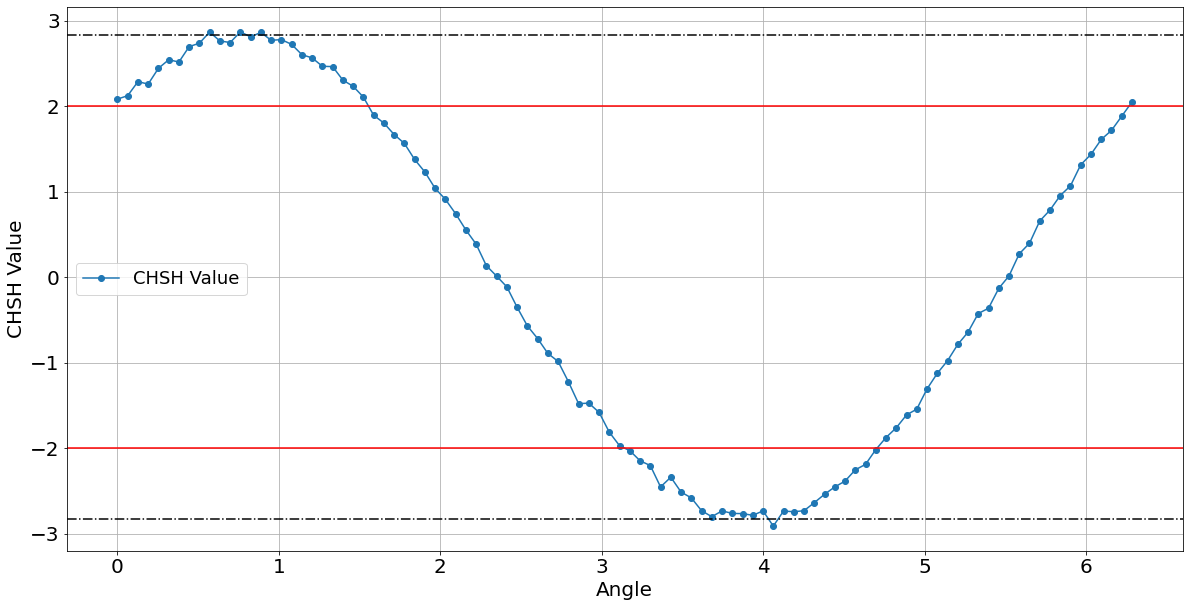

In [3]:
import matplotlib.pyplot as mplt
mplt.figure(figsize=(20,10))
mplt.rcParams.update({'font.size': 20})
mplt.plot(tv,CHSHValArr,'o-',label = 'CHSH Value')

mplt.grid(which='major',axis='both')
mplt.rcParams.update({'font.size': 18})
mplt.legend()
mplt.axhline(y=2, color='r', linestyle='-')
mplt.axhline(y=-2, color='r', linestyle='-')
mplt.axhline(y=np.sqrt(2)*2, color='k', linestyle='-.')
mplt.axhline(y=-np.sqrt(2)*2, color='k', linestyle='-.')
mplt.xlabel('Angle')
mplt.ylabel('CHSH Value')

# Run on a QPU

To run CSHS inequality on a QPU, we replace the LocalSimulator with an AwsDevice. 
To reduce the cost, we run the the experiment only for the theta which gave Max CSHS inequality value.

The cost to run this experiment is \\$0.3 per task and \\$0.00035 per shot on the Oxford Quantum Circuits Lucy device. Since we have four circuits of 1000 shots each, that totals \\$2.60 USD.

In [4]:
from braket.aws import AwsDevice

device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
# Uncomment the following to run on QPU
#device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")

tasks = submit_cshs_tasks(device,a=cshs_inequality_lhs_max_theta,a_=cshs_inequality_lhs_max_theta,b=0,b_=0,verbose=True)
cshs_value,cshs_inequality_lhs,results, E_ab, E_ab_,E_a_b,E_a_b_ = \
get_cshs_results(tasks,verbose=True)
if cshs_inequality_lhs>2:
    print("CSHS inequality violated:",cshs_inequality_lhs)
else:
    print("CSHS inequality not violated probably due to noise:",cshs_inequality_lhs)


a: 4.0618571682777125
a_: 4.0618571682777125
b: 0
b_: 0
circ_ab
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(4.06)-
        |          
q1 : ---X----------

T  : |0|1|   2    |
circ_ab_
: T  : |0|1|   2    |
                   
q0 : -H-C-Ry(4.06)-
        |          
q1 : ---X-H--------

T  : |0|1|   2    |
circ_a_b
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(4.06)-H-
        |            
q1 : ---X------------

T  : |0|1|   2    |3|
circ_a_b_
: T  : |0|1|   2    |3|
                     
q0 : -H-C-Ry(4.06)-H-
        |            
q1 : ---X-H----------

T  : |0|1|   2    |3|
cshs_value: -2.8600000000000003
E(a,b) = -0.6200000000000001,E(a,b') = 0.802, E(a',b) = -0.802, E(a',b') = -0.6360000000000001
CSHS inequality: 2.8600000000000003 ≤ 2
CSHS inequality is violated!
Notice that the quantity may not be exactly as predicted by Quantum theory.This is may be due to less number shots or the effects of noise on the QPU.
CSHS inequality violated: 2.8600000000000003


We see that CSHS inequality is violated, so the device is demonstrating quantum behavior.

In [5]:
print(
    f"Estimated cost to run this example: {tracker.qpu_tasks_cost() + tracker.simulator_tasks_cost() :.2f} USD"
)

Estimated cost to run this example: 0.02 USD


Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).